# Using Learning Rate Schedules for Deep Learning Models in Python with Keras
http://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/

Training a neural network or large deep learning model is a difficult optimization task.

The classical algorithm to train neural networks is called [stochastic gradient descent](http://machinelearningmastery.com/gradient-descent-for-machine-learning/). It has been well established that you can achieve increased performance and faster training on some problems by using a learning rate that changes during training.

In this post you will discover how you can use different learning rate schedules for your neural network models in Python using the Keras deep learning library.

After reading this post you will know:

- How to configure and evaluate a time-based learning rate schedule.
- How to configure and evaluate a drop-based learning rate schedule.

Let’s get started.

## Learning Rate Schedule For Training Models

Adapting the learning rate for your stochastic gradient descent optimization procedure can increase performance and reduce training time.

Sometimes this is called learning rate annealing or adaptive learning rates. Here we will call this approach a learning rate schedule, were the default schedule is to use a constant learning rate to update network weights for each training epoch.

The simplest and perhaps most used adaptation of learning rate during training are techniques that reduce the learning rate over time. These have the benefit of making large changes at the beginning of the training procedure when larger learning rate values are used, and decreasing the learning rate such that a smaller rate and therefore smaller training updates are made to weights later in the training procedure.

This has the effect of quickly learning good weights early and fine tuning them later.

Two popular and easy to use learning rate schedules are as follows:

- Decrease the learning rate gradually based on the epoch.
- Decrease the learning rate using punctuated large drops at specific epochs.

Next, we will look at how you can use each of these learning rate schedules in turn with Keras.

## Time-Based Learning Rate Schedule

Keras has a time-based learning rate schedule built in.

The stochastic gradient descent optimization algorithm implementation in the SGD class has an argument called decay. This argument is used in the time-based learning rate decay schedule equation as follows:

```
LearningRate = LearningRate * 1/(1 + decay * epoch)
```

When the decay argument is zero (the default), this has no effect on the learning rate.

```
LearningRate = 0.1 * 1/(1 + 0.0 * 1)
LearningRate = 0.1
```

When the decay argument is specified, it will decrease the learning rate from the previous epoch by the given fixed amount.

For example, if we use the initial learning rate value of 0.1 and the decay of 0.001, the first 5 epochs will adapt the learning rate as follows:

```
Epoch	Learning Rate
1		0.1
2		0.0999000999
3		0.0997006985
4		0.09940249103
5		0.09900646517
```

Extending this out to 100 epochs will produce the following graph of learning rate (y axis) versus epoch (x axis):

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

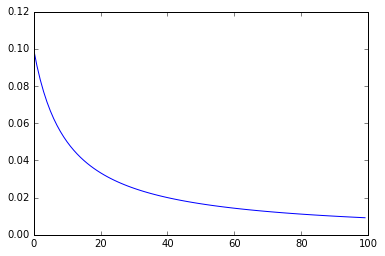

In [29]:
LearningRate = 0.1
decay = 0.1
epoch = 100

x = np.asarray(range(epoch))
LR = LearningRate * 1/(1 + decay * x)

plt.plot(LR);

The example below demonstrates using the time-based learning rate adaptation schedule in Keras.

It is demonstrated on the [Ionosphere binary classification problem](http://archive.ics.uci.edu/ml/datasets/Ionosphere). This is a small dataset that you can [download from the UCI Machine Learning repository](http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data). Place the data file in your working directory with the filename ionosphere.csv.

The ionosphere dataset is good for practicing with neural networks because all of the input values are small numerical values of the same scale.

A small neural network model is constructed with a single hidden layer with 34 neurons and using the rectifier activation function. The output layer has a single neuron and uses the sigmoid activation function in order to output probability-like values.

The learning rate for stochastic gradient descent has been set to a higher value of 0.1. The model is trained for 50 epochs and the decay argument has been set to 0.002, calculated as 0.1/50. Additionally, it can be a good idea to use momentum when using an adaptive learning rate. In this case we use a momentum value of 0.8.

The complete example is listed below.

In [30]:
import pandas
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataframe = pandas.read_csv("Data\ionosphere.csv", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(34, input_dim=34, init='normal', activation='relu'))
model.add(Dense(1, init='normal', activation='sigmoid'))

# Compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
model.fit(X, Y, validation_split=0.33, nb_epoch=epochs, batch_size=28)

Using Theano backend.


Train on 235 samples, validate on 116 samples
Epoch 1/50
235/235 [==============================] - 0s - loss: 0.6756 - acc: 0.7277 - val_loss: 0.6029 - val_acc: 0.8621
Epoch 2/50
235/235 [==============================] - 0s - loss: 0.6179 - acc: 0.7787 - val_loss: 0.4956 - val_acc: 0.8793
Epoch 3/50
235/235 [==============================] - 0s - loss: 0.5326 - acc: 0.8170 - val_loss: 0.4504 - val_acc: 0.9483
Epoch 4/50
235/235 [==============================] - 0s - loss: 0.4405 - acc: 0.8298 - val_loss: 0.4003 - val_acc: 0.9397
Epoch 5/50
235/235 [==============================] - 0s - loss: 0.3678 - acc: 0.8681 - val_loss: 0.4080 - val_acc: 0.8793
Epoch 6/50
235/235 [==============================] - 0s - loss: 0.3104 - acc: 0.8979 - val_loss: 0.2980 - val_acc: 0.9397
Epoch 7/50
235/235 [==============================] - 0s - loss: 0.2732 - acc: 0.9234 - val_loss: 0.1971 - val_acc: 0.9569
Epoch 8/50
235/235 [==============================] - 0s - loss: 0.2313 - acc: 0.9106 - val_l

The model is trained on 67% of the dataset and evaluated using a 33% validation dataset.

Running the example shows a classification accuracy of 99.14%. This is higher than the baseline of 95.69% without the learning rate decay or momentum.

## Drop-Based Learning Rate Schedule

Another popular learning rate schedule used with deep learning models is to systematically drop the learning rate at specific times during training.

Often this method is implemented by dropping the learning rate by half every fixed number of epochs. For example, we may have an initial learning rate of 0.1 and drop it by 0.5 every 10 epochs. The first 10 epochs of training would use a value of 0.1, in the next 10 epochs a learning rate of 0.05 would be used, and so on.

If we plot out the learning rates for this example out to 100 epochs you get the graph below showing learning rate (y axis) versus epoch (x axis).

![](img\Drop-Based-Learning-Rate-Schedule.png)

We can implement this in Keras using a the [LearningRateScheduler](http://keras.io/callbacks/) callback when fitting the model.

The LearningRateScheduler callback allows us to define a function to call that takes the epoch number as an argument and returns the learning rate to use in stochastic gradient descent. When used, the learning rate specified by stochastic gradient descent is ignored.

In the code below, we use the same example before of a single hidden layer network on the Ionosphere dataset. A new step_decay() function is defined that implements the equation:

```
LearningRate = InitialLearningRate * DropRate^floor(Epoch / EpochDrop)
```

Where InitialLearningRate is the initial learning rate such as 0.1, the DropRate is the amount that the learning rate is modified each time it is changed such as 0.5, Epoch is the current epoch number and EpochDrop is how often to change the learning rate such as 10.

Notice that we set the learning rate in the SGD class to 0 to clearly indicate that it is not used. Nevertheless, you can set a momentum term in SGD if you want to use momentum with this learning rate schedule.

In [31]:
import pandas
import numpy
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataframe = pandas.read_csv("Data\ionosphere.csv", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(34, input_dim=34, init='normal', activation='relu'))
model.add(Dense(1, init='normal', activation='sigmoid'))

# Compile model
sgd = SGD(lr=0.0, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]

# Fit the model
model.fit(X, Y, validation_split=0.33, nb_epoch=50, batch_size=28, callbacks=callbacks_list)

Train on 235 samples, validate on 116 samples
Epoch 1/50
235/235 [==============================] - 0s - loss: 0.6742 - acc: 0.7277 - val_loss: 0.5805 - val_acc: 0.8707
Epoch 2/50
235/235 [==============================] - 0s - loss: 0.5959 - acc: 0.7745 - val_loss: 0.4430 - val_acc: 0.8879
Epoch 3/50
235/235 [==============================] - 0s - loss: 0.4660 - acc: 0.8043 - val_loss: 0.3540 - val_acc: 0.9397
Epoch 4/50
235/235 [==============================] - 0s - loss: 0.3386 - acc: 0.8766 - val_loss: 0.3263 - val_acc: 0.8879
Epoch 5/50
235/235 [==============================] - 0s - loss: 0.2724 - acc: 0.8851 - val_loss: 0.3341 - val_acc: 0.8879
Epoch 6/50
235/235 [==============================] - 0s - loss: 0.2235 - acc: 0.9191 - val_loss: 0.2656 - val_acc: 0.8966
Epoch 7/50
235/235 [==============================] - 0s - loss: 0.1990 - acc: 0.9362 - val_loss: 0.1792 - val_acc: 0.9741
Epoch 8/50
235/235 [==============================] - 0s - loss: 0.1568 - acc: 0.9532 - val_l

Running the example results in a classification accuracy of 99.14% on the validation dataset, again an improvement over the baseline for the model on the problem.

## Tips for Using Learning Rate Schedules

This section lists some tips and tricks to consider when using learning rate schedules with neural networks.

- **Increase the initial learning rate**. Because the learning rate will very likely decrease, start with a larger value to decrease from. A larger learning rate will result in a lot larger changes to the weights, at least in the beginning, allowing you to benefit from the fine tuning later.
- **Use a large momentum**. Using a larger momentum value will help the optimization algorithm to continue to make updates in the right direction when your learning rate shrinks to small values.
- **Experiment with different schedules**. It will not be clear which learning rate schedule to use so try a few with different configuration options and see what works best on your problem. Also try schedules that change exponentially and even schedules that respond to the accuracy of your model on the training or test datasets.